In [1]:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import pandas_profiling
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
import matplotlib.pyplot  as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  cross_val_score

In [2]:
data=pd.read_csv("/home/manikanta/Documents/ML/classification/Ennsembling_learning/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

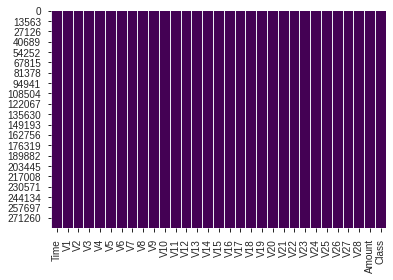

In [7]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [8]:
#sns.pairplot(data)

In [9]:
#pandas_profiling.ProfileReport(data)

In [10]:
from sklearn.model_selection import train_test_split
x=data.drop('Class',axis=1)
y=data['Class']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [13]:
#SVM ALgorithm
from sklearn.svm import SVC
clf=SVC()
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
trine_score=clf.score(x_train,y_train)
trine_score

0.998288310035331

In [15]:
test_score=clf.score(x_test,y_test)
test_score

0.9982093325374811

In [16]:
yhat=clf.predict(x_test)

In [17]:
pd.DataFrame({'Acutual Data':y_test,'New_prediction':yhat})

,Acutual Data,New_prediction
167517,0,0
133114,0,0
179906,0,0
4183,0,0
196605,0,0
...,...,...
284071,0,0
85616,0,0
117905,0,0
260212,0,0


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

print(confusion_matrix(y_test,yhat)) 
print(classification_report(y_test,yhat))

[[56860     0]
 [  102     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56860
           1       0.00      0.00      0.00       102

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
#Decision Tree Algorithm
x1=data.drop('Class',axis=1)
y1=data['Class']

In [21]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20)

In [36]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [37]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf.fit(x1,y1)
clf1

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
trine_score=clf.score(x_train1,y_train1)
trine_score

1.0

In [39]:
test_score=clf.score(x_test1,y_test1)
test_score

1.0

In [40]:
yhat1=clf1.predict(x_test1)

In [41]:
pd.DataFrame({'Acutual Data':y_test1,'New_prediction':yhat1})

,Acutual Data,New_prediction
2714,0,0
207250,0,0
181476,0,0
53946,0,0
8500,0,0
...,...,...
20980,0,0
71047,0,0
106316,0,0
56232,0,0


In [54]:
print(confusion_matrix(y_test1,yhat1)) 
print(classification_report(y_test1,yhat1))

[[56863     0]
 [    0    99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00        99

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



[Text(88.73553017921552, 213.69103448275862, 'X[17] <= -2.754\ngini = 0.003\nsamples = 284807\nvalue = [284315, 492]'),
 Text(65.93356176735799, 206.19310344827585, 'X[12] <= -2.181\ngini = 0.362\nsamples = 443\nvalue = [105, 338]'),
 Text(50.718124436429214, 198.6951724137931, 'X[14] <= -3.43\ngini = 0.296\nsamples = 410\nvalue = [74, 336]'),
 Text(28.015725879170425, 191.19724137931036, 'X[26] <= -0.264\ngini = 0.228\nsamples = 365\nvalue = [48, 317]'),
 Text(16.74503155996393, 183.69931034482758, 'X[27] <= 1.077\ngini = 0.459\nsamples = 98\nvalue = [35, 63]'),
 Text(10.30463480613165, 176.20137931034483, 'X[5] <= -0.013\ngini = 0.144\nsamples = 64\nvalue = [5, 59]'),
 Text(5.152317403065825, 168.70344827586206, 'X[19] <= 2.539\ngini = 0.034\nsamples = 57\nvalue = [1, 56]'),
 Text(2.5761587015329126, 161.2055172413793, 'gini = 0.0\nsamples = 53\nvalue = [0, 53]'),
 Text(7.728476104598737, 161.2055172413793, 'X[20] <= 0.052\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(5.1523174

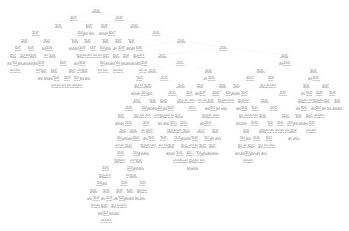

In [49]:
tree.plot_tree(clf1)

In [44]:
#AdaBoosting Algorithm
x2=data.drop('Class',axis=1)
y2=data['Class']

In [45]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.20)

In [46]:
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(227845, 30)
(227845,)
(56962, 30)
(56962,)


In [48]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
clf2 = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=0))
clf2.fit(x2,y2)
clf2

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [50]:
trine_score=clf2.score(x_train2,y_train2)
trine_score

1.0

In [51]:
test_score=clf2.score(x_test2,y_test2)
test_score

1.0

In [52]:
yhat2=clf2.predict(x_test2)

In [53]:
pd.DataFrame({'Acutual Data':y_test2,'New_prediction':yhat2})

,Acutual Data,New_prediction
163988,0,0
262966,0,0
154486,0,0
112945,0,0
54850,0,0
...,...,...
111566,0,0
85908,0,0
262479,0,0
177379,0,0


In [55]:
print(confusion_matrix(y_test2,yhat2)) 
print(classification_report(y_test2,yhat2))

[[56861     0]
 [    0   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       1.00      1.00      1.00       101

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962



In [56]:
#RandomForest Algorithm
x3=data.drop('Class',axis=1)
y3=data['Class']


In [57]:
x_train3,x_test3,y_train3,y_test3=train_test_split(x3,y3,test_size=0.20)

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier()
clf3.fit(x3, y3)
clf3

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
trine_score=clf3.score(x_train3,y_train3)
trine_score

0.9999956110513727

In [61]:
test_score=clf3.score(x_test3,y_test3)
test_score

1.0

In [62]:
yhat3=clf3.predict(x_test3)

In [63]:
pd.DataFrame({'Acutual Data':y_test3,'New_prediction':yhat3})

,Acutual Data,New_prediction
19511,0,0
37513,0,0
178677,0,0
65459,0,0
278801,0,0
...,...,...
238377,0,0
129443,0,0
57895,0,0
140591,0,0


In [64]:
print(confusion_matrix(y_test3,yhat3)) 
print(classification_report(y_test3,yhat3))

[[56852     0]
 [    0   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56852
           1       1.00      1.00      1.00       110

    accuracy                           1.00     56962
   macro avg       1.00      1.00      1.00     56962
weighted avg       1.00      1.00      1.00     56962

